## 농산물 가격 예측 AI 경진대회 train_at EDA
### 0. 패키지 & 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import datetime as dt

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [3]:
train_at = pd.read_csv('train_at_feature.csv')
train_at.head()

C:\Users\juyeo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,SALEDATE,WHSAL_NM,CMP_NM,PUM_NM,KIND_NM,DAN_NM,POJ_NM,SIZE_NM,LV_NM,SAN_NM,DANQ,QTY,COST,TOT_QTY,TOT_AMT
0,20160109,부산엄궁도매,부산청과,배추,쌈배추,kg,상자,.,보통,광주 북구,10.0,25.0,6110.0,250.0,152750.0
1,20160109,부산엄궁도매,부산청과,배추,쌈배추,kg,상자,.,보통,광주 북구,10.0,25.0,6200.0,250.0,155000.0
2,20160109,부산엄궁도매,부산청과,배추,쌈배추,kg,상자,.,보통,광주 북구,10.0,25.0,6200.0,250.0,155000.0
3,20160109,부산엄궁도매,부산청과,배추,기타배추,kg,단,.,보통,부산 중구,4.0,100.0,2500.0,400.0,250000.0
4,20160109,부산엄궁도매,부산청과,배추,기타배추,kg,그물망,.,보통,전라남도 해남군,15.0,700.0,4000.0,10500.0,2800000.0


In [4]:
leafy = ['미나리', '시금치', '청상추', '배추', '얼갈이배추', '양배추', '깻잎']
train_at_leafy = pd.DataFrame()

for i in leafy:
    new_data = train_at[train_at['PUM_NM'] == i]
    train_at_leafy = pd.concat([train_at_leafy,new_data])
        
train_at_leafy

,SALEDATE,WHSAL_NM,CMP_NM,PUM_NM,KIND_NM,DAN_NM,POJ_NM,SIZE_NM,LV_NM,SAN_NM,DANQ,QTY,COST,TOT_QTY,TOT_AMT
292057,20160109,부산엄궁도매,부산청과,미나리,미나리(일반),kg,단,.,보통,경상남도 양산시,1.0,500.0,370.0,500.0,185000.0
292058,20160109,부산엄궁도매,부산청과,미나리,미나리(일반),kg,단,.,보통,경상남도 양산시,1.0,200.0,450.0,200.0,90000.0
292059,20160109,부산엄궁도매,부산청과,미나리,미나리(일반),kg,상자,.,보통,서울 송파구,4.0,20.0,15000.0,80.0,300000.0
292060,20160109,인천삼산도매,부평농산,미나리,미나리(일반),kg,상자,.,특,광주 남구,4.0,15.0,12000.0,60.0,180000.0
292061,20160109,인천삼산도매,부평농산,미나리,미나리(일반),kg,상자,.,특,광주 남구,4.0,5.0,12000.0,20.0,60000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36697912,2020-09-28,인천구월도매,인천농산물,깻잎,깻잎(일반),kg,상자,.,상,충청남도 논산시,2.0,4.0,23000.0,8.0,92000.0
36697913,2020-09-28,인천구월도매,인천농산물,깻잎,깻잎(일반),kg,상자,.,상,충청남도 논산시,2.0,17.0,24000.0,34.0,408000.0
36697914,2020-09-28,인천구월도매,인천농산물,깻잎,깻잎(일반),kg,상자,.,상,충청남도 논산시,2.0,2.0,22000.0,4.0,44000.0
36697915,2020-09-28,인천구월도매,인천농산물,깻잎,깻잎(일반),kg,상자,.,상,충청남도 논산시,2.0,6.0,21000.0,12.0,126000.0


In [53]:
train_at_leafy.dtypes

SALEDATE     object
WHSAL_NM     object
CMP_NM       object
PUM_NM       object
KIND_NM      object
DAN_NM       object
POJ_NM       object
SIZE_NM      object
LV_NM        object
SAN_NM       object
DANQ        float64
QTY         float64
COST        float64
TOT_QTY     float64
TOT_AMT     float64
dtype: object

In [5]:
leafy = ['미나리', '시금치', '청상추', '배추', '얼갈이배추', '양배추', '깻잎']

def leafy_thing (object):
    thing = train_at_leafy[train_at_leafy['PUM_NM'] == object]
    return thing

In [6]:
thing = leafy_thing('미나리')
thing

,SALEDATE,WHSAL_NM,CMP_NM,PUM_NM,KIND_NM,DAN_NM,POJ_NM,SIZE_NM,LV_NM,SAN_NM,DANQ,QTY,COST,TOT_QTY,TOT_AMT
292057,20160109,부산엄궁도매,부산청과,미나리,미나리(일반),kg,단,.,보통,경상남도 양산시,1.0,500.0,370.0,500.0,185000.0
292058,20160109,부산엄궁도매,부산청과,미나리,미나리(일반),kg,단,.,보통,경상남도 양산시,1.0,200.0,450.0,200.0,90000.0
292059,20160109,부산엄궁도매,부산청과,미나리,미나리(일반),kg,상자,.,보통,서울 송파구,4.0,20.0,15000.0,80.0,300000.0
292060,20160109,인천삼산도매,부평농산,미나리,미나리(일반),kg,상자,.,특,광주 남구,4.0,15.0,12000.0,60.0,180000.0
292061,20160109,인천삼산도매,부평농산,미나리,미나리(일반),kg,상자,.,특,광주 남구,4.0,5.0,12000.0,20.0,60000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36730554,2020-09-28,인천구월도매,인천농산물,미나리,돌미나리,kg,상자,.,상,경기도 시흥시,4.0,11.0,31000.0,44.0,341000.0
36730555,2020-09-28,인천구월도매,인천농산물,미나리,돌미나리,kg,상자,.,상,경기도 시흥시,4.0,10.0,31000.0,40.0,310000.0
36730556,2020-09-28,인천구월도매,인천농산물,미나리,돌미나리,kg,상자,.,상,경기도 시흥시,4.0,10.0,31000.0,40.0,310000.0
36730557,2020-09-28,인천구월도매,인천농산물,미나리,돌미나리,kg,상자,.,상,경기도 시흥시,4.0,20.0,31000.0,80.0,620000.0


thing.groupby(thing['CMP_NM']).count()

In [48]:
def at_EDA (data,how,what):
    n_data = data.groupby(data['WHSAL_NM'].str[:2]).count()
    fig = plt.figure(figsize=(8,4))
    sns.barplot(x = n_data.index, y = 'SALEDATE',data=n_data ,palette="Blues_d")
    plt.title('%s 도매시장 별 거래 건수 EDA'%what)
    plt.xticks(rotation=45)
    plt.show()
    
    n_data = data.groupby(data['KIND_NM']).count()
    fig = plt.figure(figsize=(8,4))
    sns.barplot(x = n_data.index, y = 'SALEDATE',data=n_data ,palette="Blues_d")
    plt.title('%s 품종에 따른 거래 건수 EDA'%what)
    plt.xticks(rotation=45)
    plt.show()
    
    if how == '합계':
        n_data = data.groupby(data['KIND_NM']).sum()
        fig = plt.figure(figsize=(8,4))
        sns.barplot(x = n_data.index, y = 'QTY',data=n_data ,palette="Blues_d")
        plt.title('%s 품종에 따른 물량 합계 EDA'%what)
        plt.xticks(rotation=45)
        plt.show()

        fig = plt.figure(figsize=(8,4))
        sns.barplot(x = n_data.index, y = 'COST',data=n_data ,palette="Blues_d")
        plt.title('%s 품종에 따른 단가 합계 EDA'%what)
        plt.xticks(rotation=45)
        plt.show()

        fig = plt.figure(figsize=(8,4))
        sns.barplot(x = n_data.index, y = 'TOT_QTY',data=n_data ,palette="Blues_d")
        plt.title('품종에 따른 총 물량 합계 EDA')
        plt.xticks(rotation=45)
        plt.show()

        fig = plt.figure(figsize=(8,4))
        sns.barplot(x = n_data.index, y = 'TOT_AMT',data=n_data ,palette="Blues_d")
        plt.title('%s 품종에 따른 총 금액 합계 EDA'%what)
        plt.xticks(rotation=45)
        plt.show()
        
    if how == '평균':
        n_data = data.groupby(data['KIND_NM']).mean()
        fig = plt.figure(figsize=(8,4))
        sns.barplot(x = n_data.index, y = 'QTY',data=n_data ,palette="Blues_d")
        plt.title('%s 품종에 따른 물량 평균 EDA'%what)
        plt.xticks(rotation=45)
        plt.show()

        fig = plt.figure(figsize=(8,4))
        sns.barplot(x = n_data.index, y = 'COST',data=n_data ,palette="Blues_d")
        plt.title('%s 품종에 따른 단가 평균 EDA'%what)
        plt.xticks(rotation=45)
        plt.show()

        fig = plt.figure(figsize=(8,4))
        sns.barplot(x = n_data.index, y = 'TOT_QTY',data=n_data ,palette="Blues_d")
        plt.title('%s 품종에 따른 총 물량 평균 EDA'%what)
        plt.xticks(rotation=45)
        plt.show()

        fig = plt.figure(figsize=(8,4))
        sns.barplot(x = n_data.index, y = 'TOT_AMT',data=n_data ,palette="Blues_d")
        plt.title('%s 품종에 따른 총 금액 평균 EDA'%what)
        plt.xticks(rotation=45)
        plt.show()

In [54]:


at_EDA(leafy_thing('청상추'),'합계','청상추')
at_EDA(leafy_thing('청상추'),'평균','청상추')

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

<Figure size 576x288 with 0 Axes>

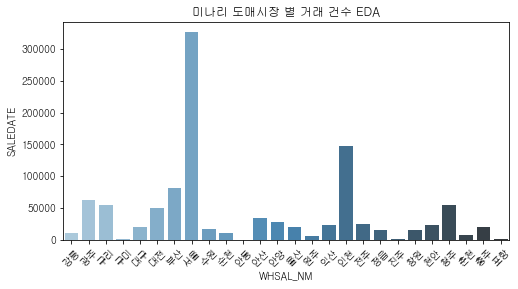

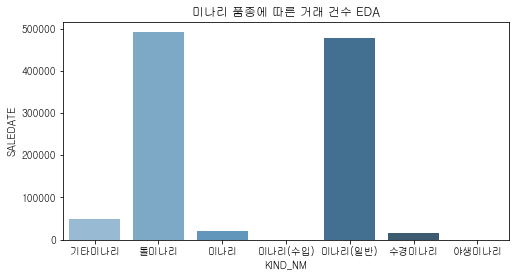

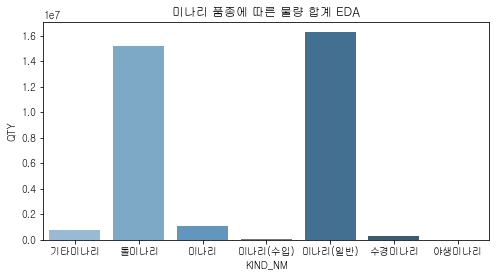

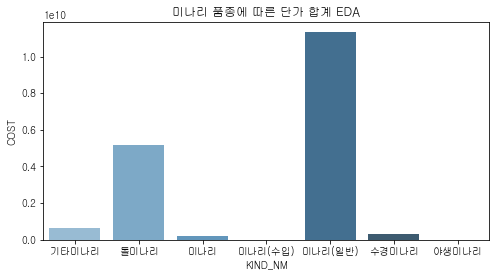

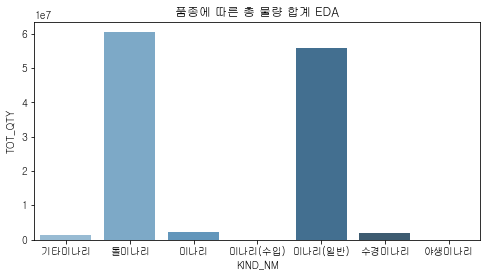

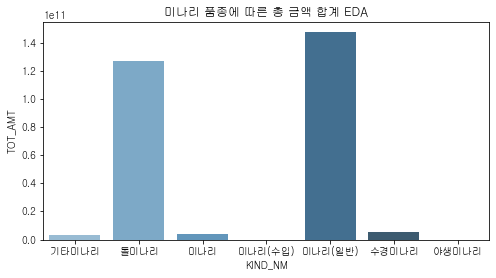

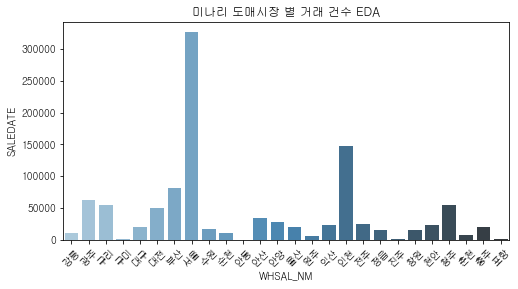

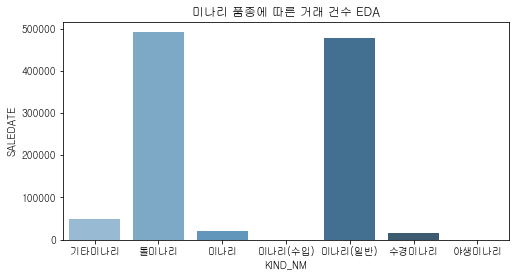

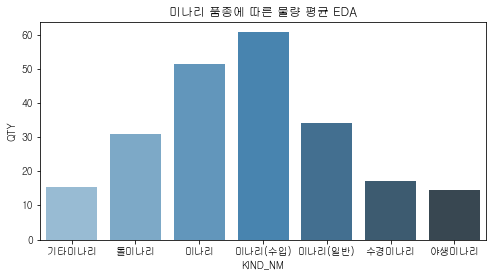

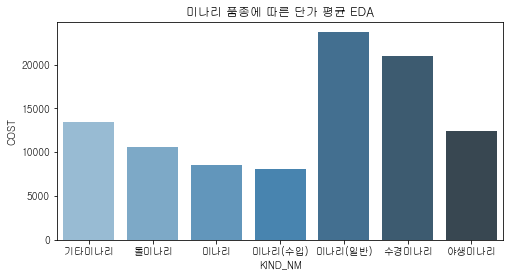

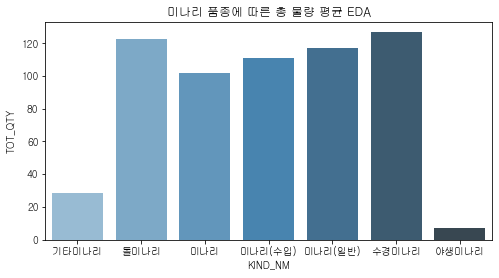

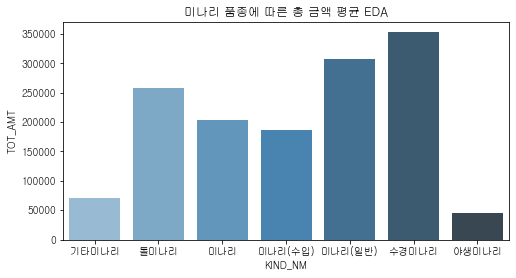

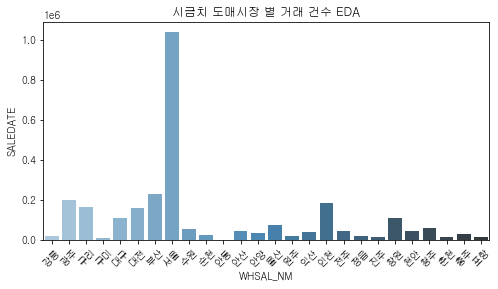

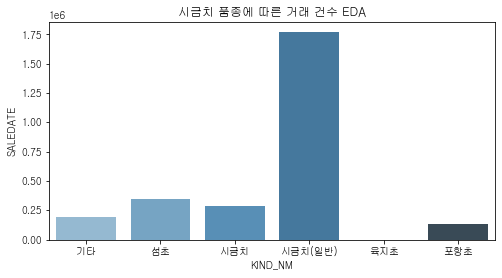

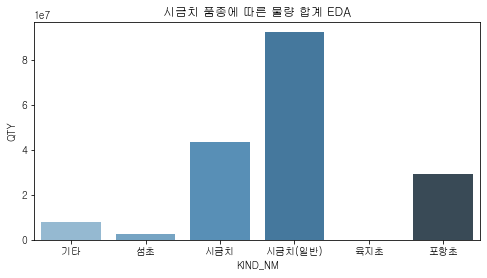

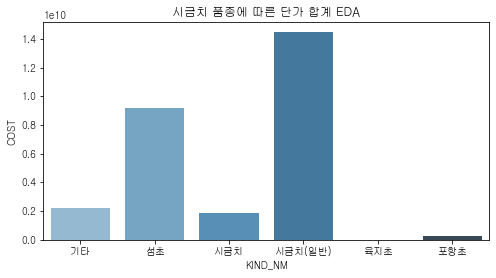

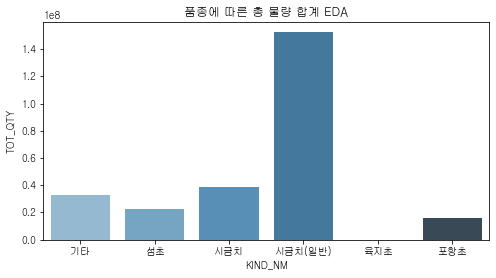

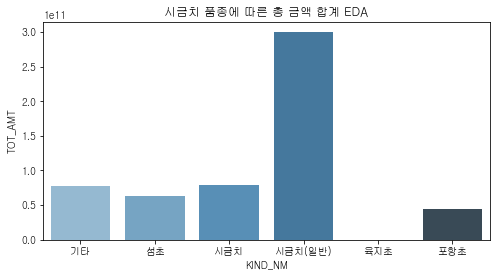

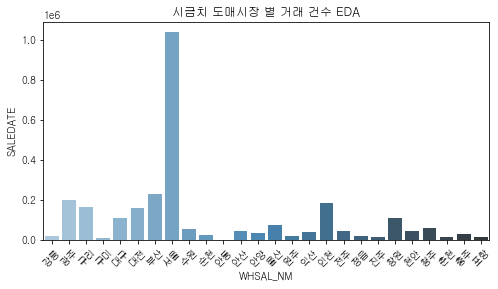

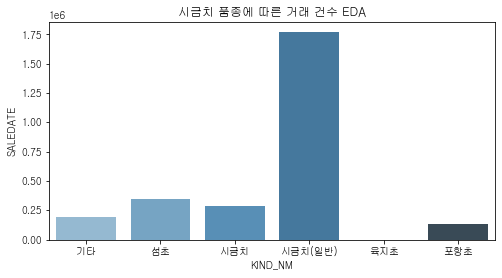

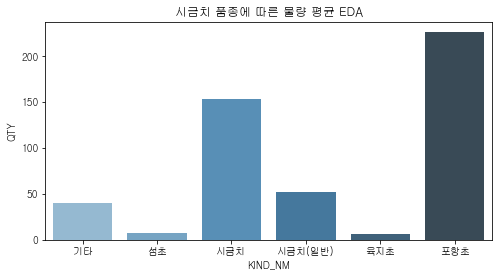

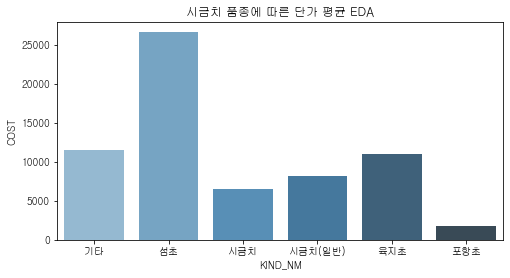

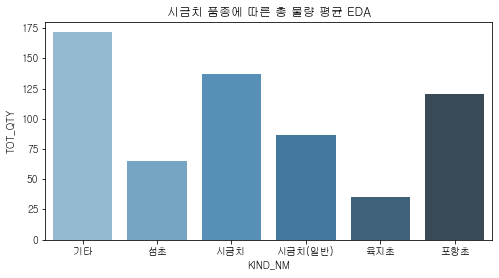

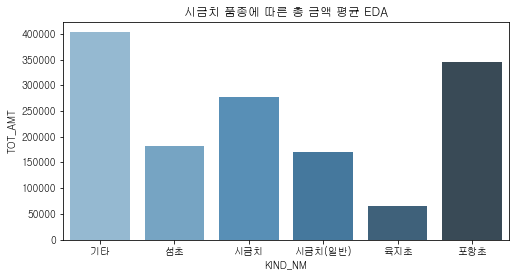

<Figure size 576x288 with 0 Axes>

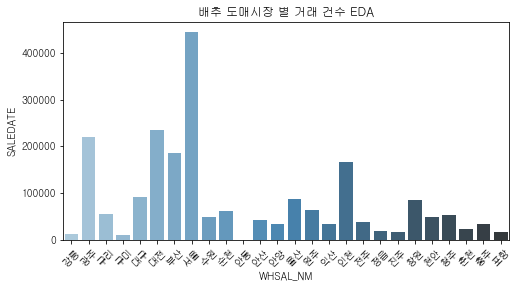

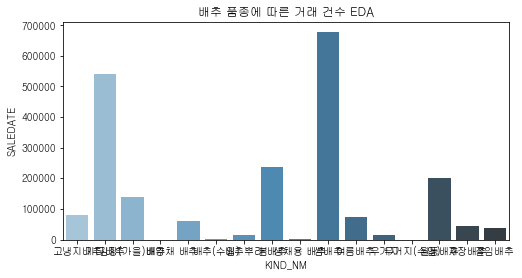

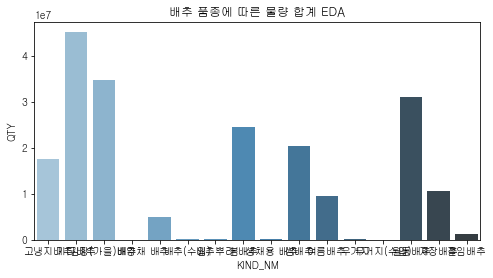

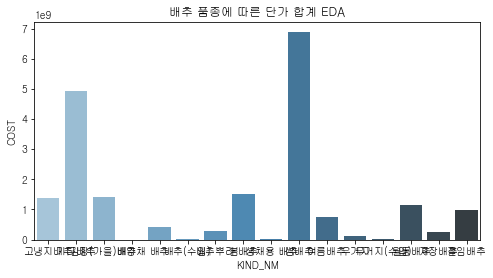

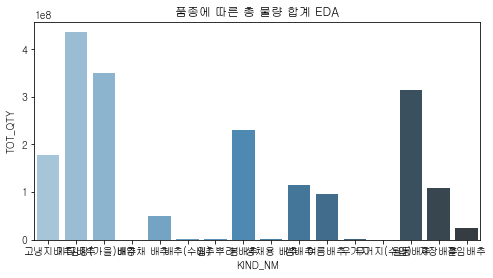

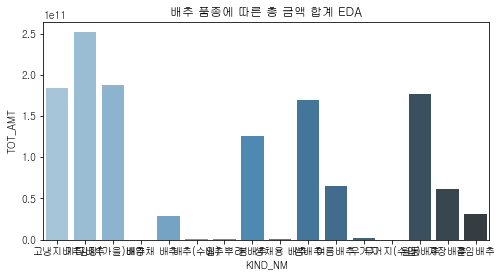

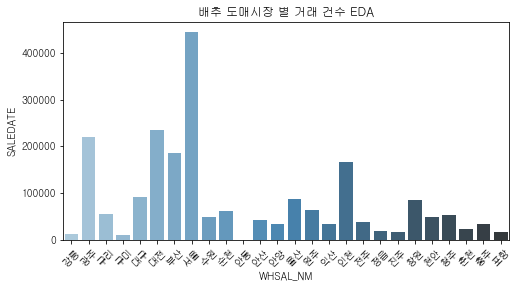

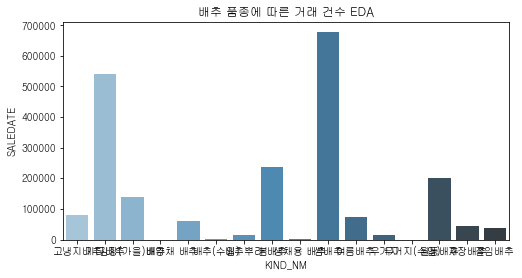

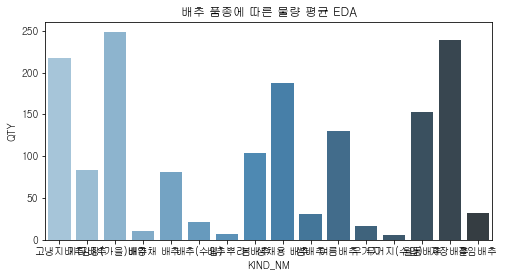

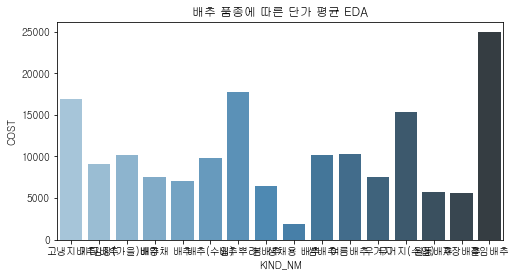

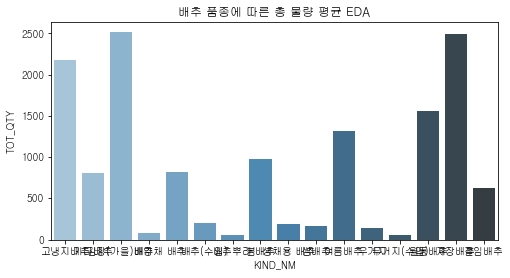

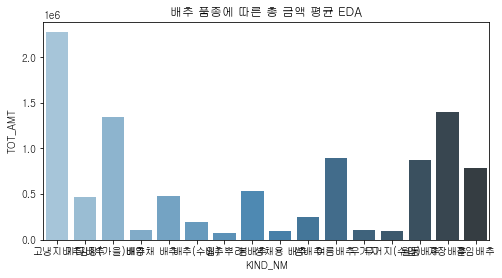

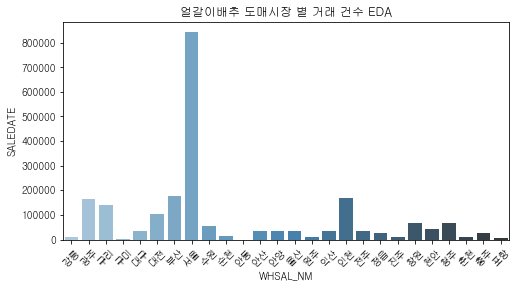

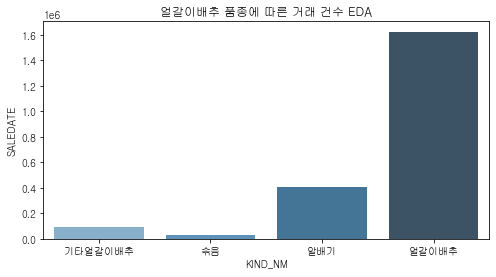

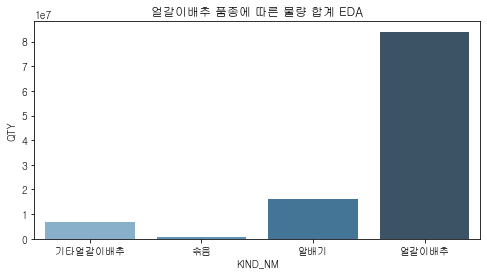

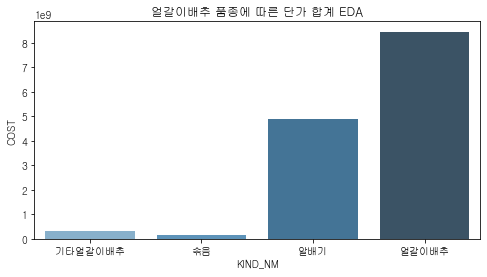

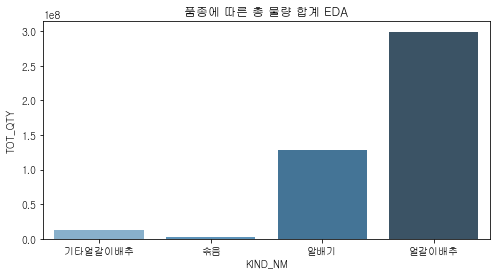

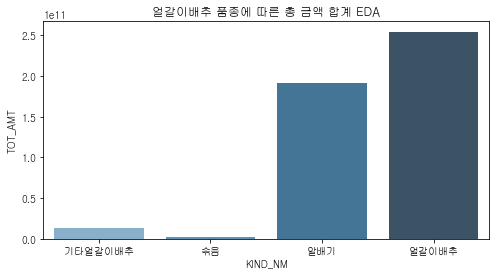

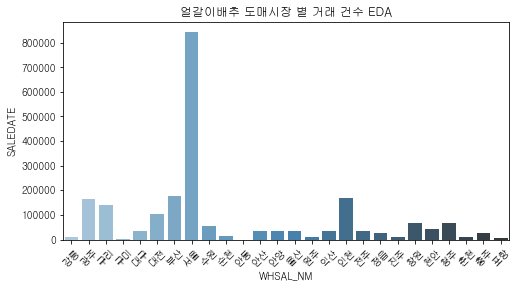

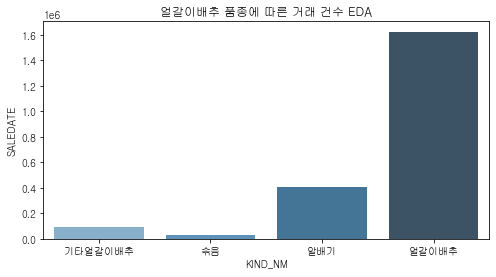

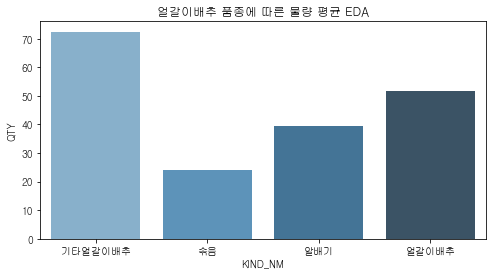

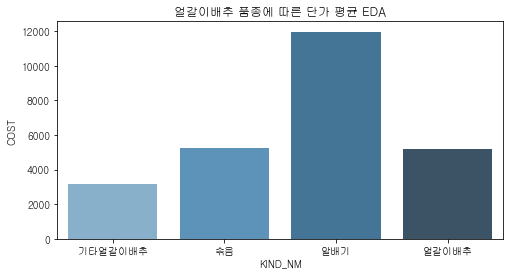

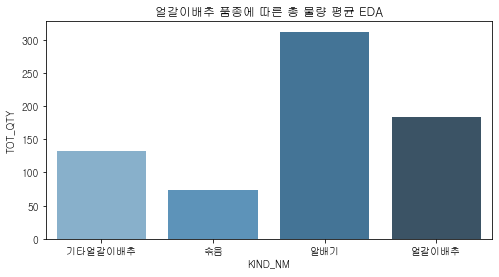

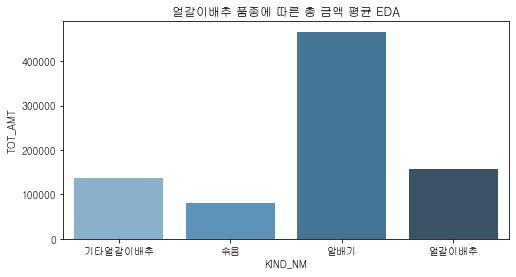

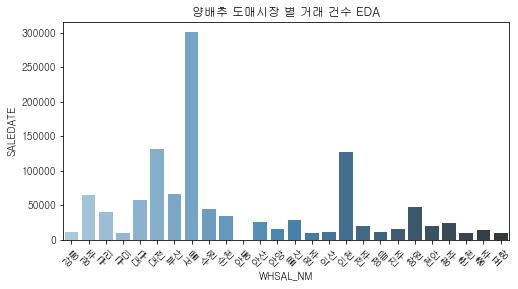

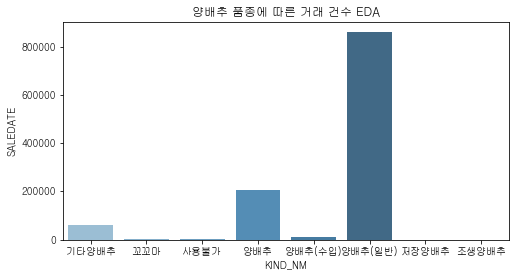

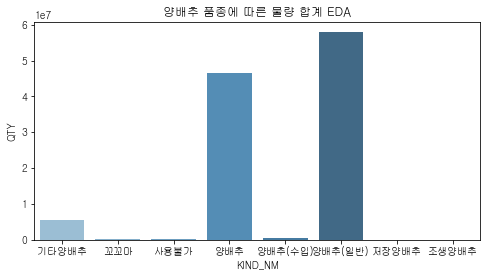

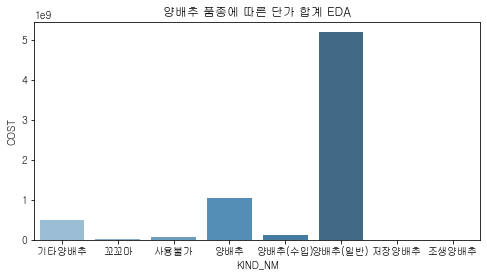

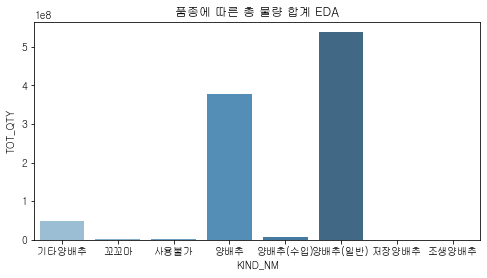

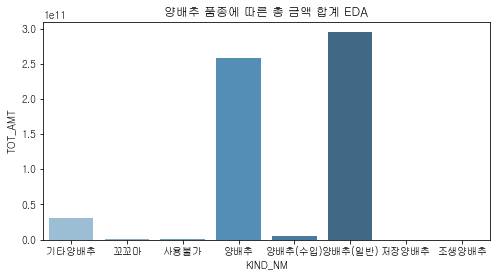

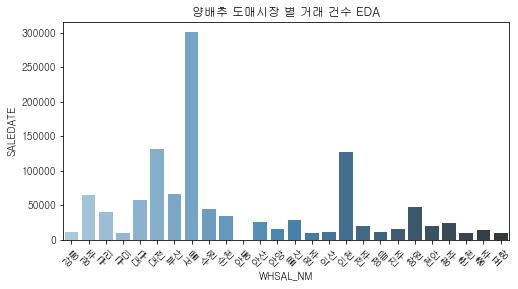

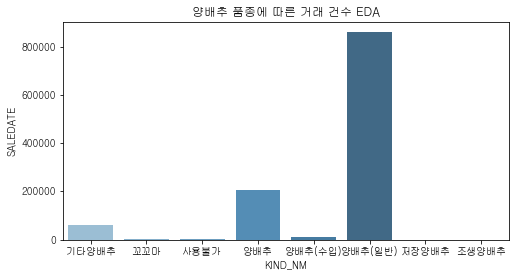

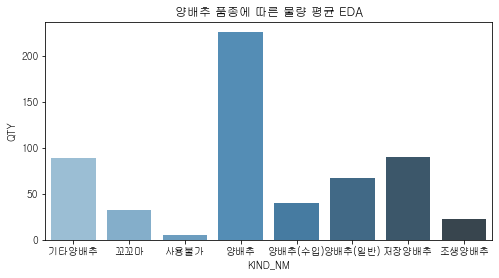

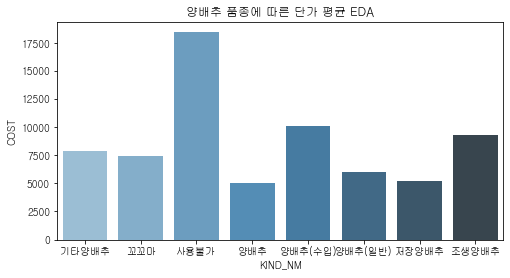

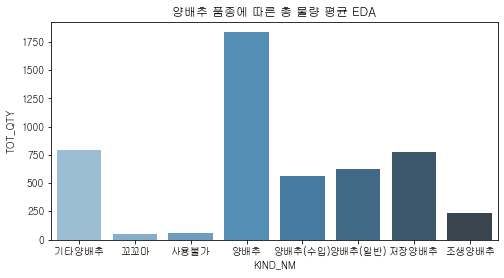

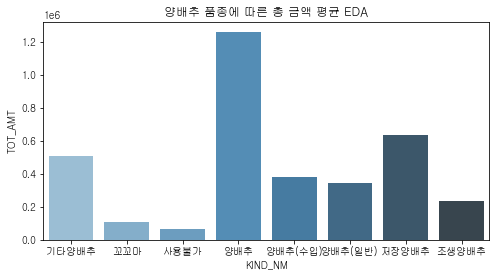

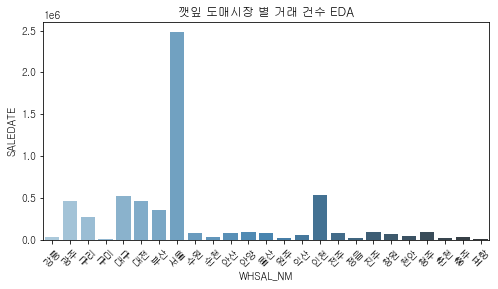

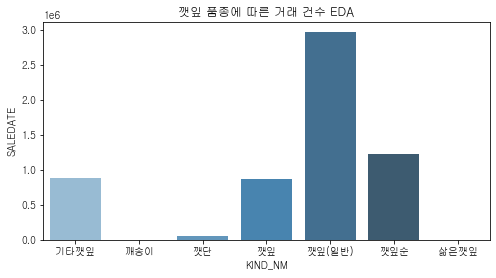

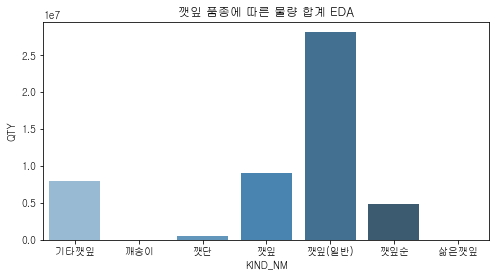

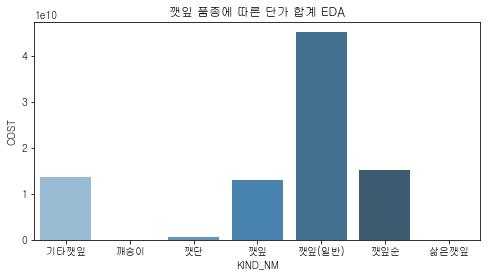

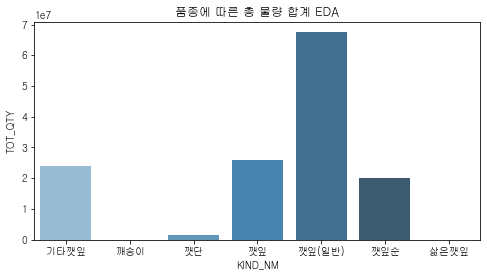

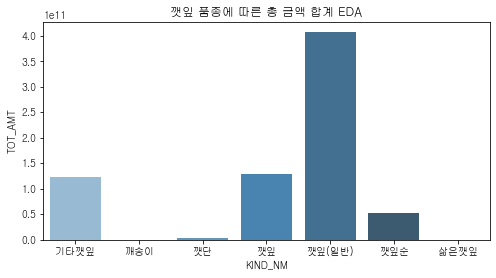

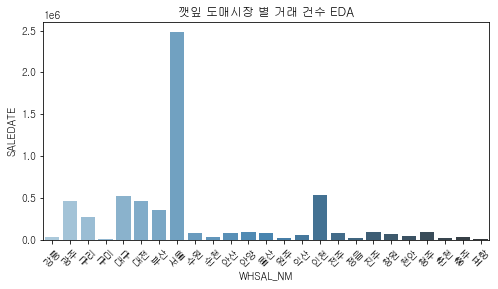

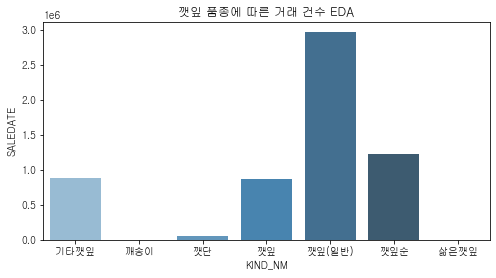

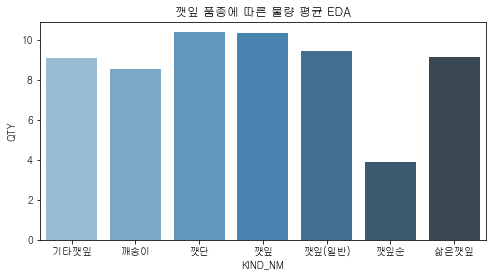

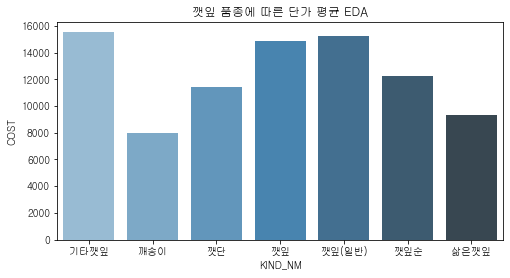

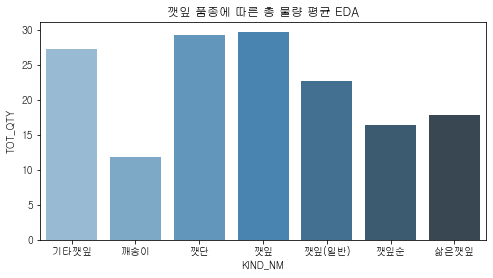

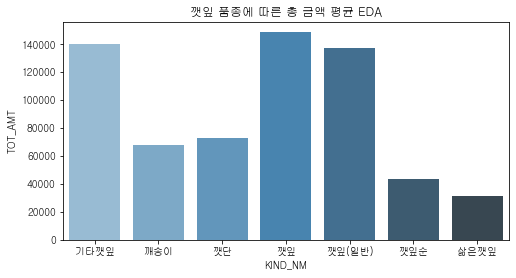

In [55]:
leafy = ['미나리', '시금치', '청상추', '배추', '얼갈이배추', '양배추', '깻잎']

for i in leafy :
    try :
        at_EDA(leafy_thing('%s'%i),'합계','%s'%i)
        at_EDA(leafy_thing('%s'%i),'평균','%s'%i)
    except:
        pass